
<left>
    <img src="http://epecora.com.br/DataFiles/PPGOLD_logo.png" width="300" alt="PPGOLD Data Science: INTRO"  />
</left>

# *Data Science - PPGOLD*


---






# Aula 06 - Scaling

Tempo estimado: **60** minutos

## Objetivos

Após completar este AULA, você será capaz de:

* Compreender a importancia do Scaling
* Aplicar diferentes técnicas de Scaling


In [3]:
import pandas as pd

from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split

from matplotlib import pyplot as plt
import matplotlib
matplotlib.rcParams['figure.figsize'] = (20, 10)

import seaborn as sns

- Da Sklearn, importei o módulo DATASETS, para poder carregar os dados de amostra, e também o linear_model, para poder executar a regressão linear
- Da Sklearn, sub-biblioteca model_selection, eu importei o train_test_split para poder dividir os dados em treinamento e teste


In [4]:
#Ler o Data Set original
df_ori = pd.read_csv("diabetes.tsv", sep = "\t") # load the dataset as a pandas data frame
df_ori.head()

#Separar as variáveis dependentes e independentes
X_ori = df_ori.drop('Y', axis = 1)
y_ori = df_ori[["Y"]]

In [5]:
df_ori.describe()

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
count,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000
mean,48.518100,1.468326,26.375792,94.647014,189.140271,115.439140,49.788462,4.070249,4.641411,91.260181,152.133484
std,13.109028,0.499561,4.418122,13.831283,34.608052,30.413081,12.934202,1.290450,0.522391,11.496335,77.093005
min,19.000000,1.000000,18.000000,62.000000,97.000000,41.600000,22.000000,2.000000,3.258100,58.000000,25.000000
25%,38.250000,1.000000,23.200000,84.000000,164.250000,96.050000,40.250000,3.000000,4.276700,83.250000,87.000000
50%,50.000000,1.000000,25.700000,93.000000,186.000000,113.000000,48.000000,4.000000,4.620050,91.000000,140.500000
75%,59.000000,2.000000,29.275000,105.000000,209.750000,134.500000,57.750000,5.000000,4.997200,98.000000,211.500000
max,79.000000,2.000000,42.200000,133.000000,301.000000,242.400000,99.000000,9.090000,6.107000,124.000000,346.000000


AGE    0.287472
SEX    0.199190
BMI    0.306144
BP     0.326266
S1     0.411919
S2     0.377758
S3    -0.155555
S4     0.370602
S5     0.377814
S6     0.351348
dtype: float64


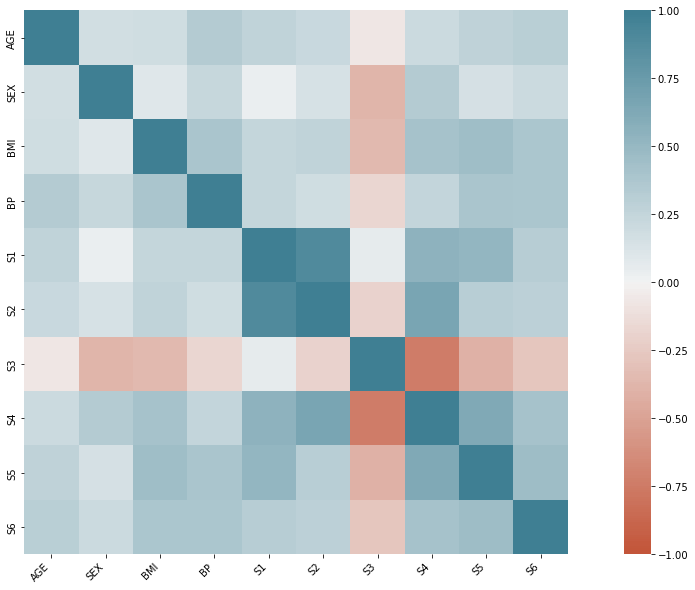

In [6]:
corr = X_ori.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);
print(corr.mean(axis =0))

# Scaling
## Min-Max Scaler 
 - y = (x – min) / (max – min)

In [7]:
from sklearn.preprocessing import MinMaxScaler
# define min max scaler
scaler = MinMaxScaler()
# transform data
scaled = pd.DataFrame(scaler.fit_transform(X_ori), columns = X_ori.columns)
scaled.head()

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6
0,0.666667,1.0,0.582645,0.549296,0.294118,0.256972,0.207792,0.282087,0.562217,0.439394
1,0.483333,0.0,0.148760,0.352113,0.421569,0.306773,0.623377,0.141044,0.222437,0.166667
2,0.883333,1.0,0.516529,0.436620,0.289216,0.258964,0.246753,0.282087,0.496578,0.409091
3,0.083333,0.0,0.301653,0.309859,0.495098,0.447211,0.233766,0.423131,0.572923,0.469697
4,0.516667,0.0,0.206612,0.549296,0.465686,0.417331,0.389610,0.282087,0.362385,0.333333


In [231]:
scaled.describe()

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6
count,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000
mean,0.491968,0.468326,0.346107,0.459817,0.451668,0.367725,0.360889,0.291996,0.485560,0.503942
std,0.218484,0.499561,0.182567,0.194807,0.169647,0.151460,0.167977,0.182010,0.183366,0.174187
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.320833,0.000000,0.214876,0.309859,0.329657,0.271165,0.237013,0.141044,0.357542,0.382576
50%,0.516667,0.000000,0.318182,0.436620,0.436275,0.355578,0.337662,0.282087,0.478062,0.500000
75%,0.666667,1.000000,0.465909,0.605634,0.552696,0.462649,0.464286,0.423131,0.610446,0.606061
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


AGE    0.287472
SEX    0.199190
BMI    0.306144
BP     0.326266
S1     0.411919
S2     0.377758
S3    -0.155555
S4     0.370602
S5     0.377814
S6     0.351348
dtype: float64


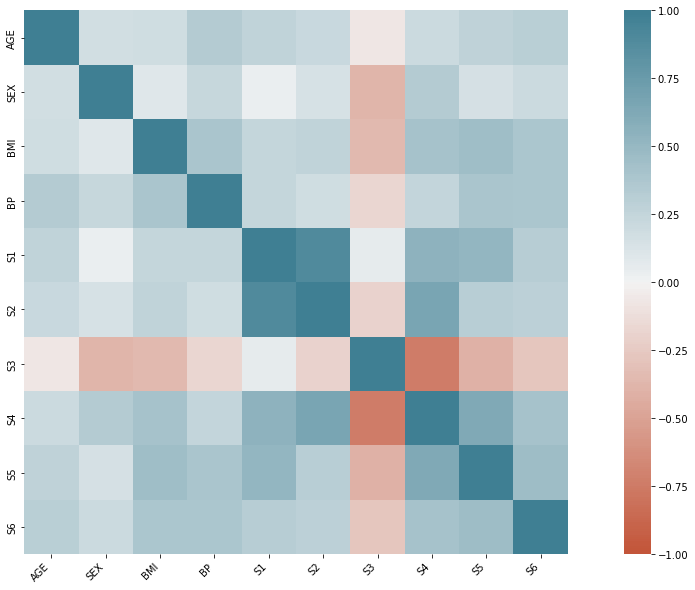

In [8]:
corr = scaled.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);
print(corr.mean(axis =0))

## Standard Scaler
- y = (x – mean) / standard_deviation


In [11]:
from sklearn.preprocessing import StandardScaler

# define standard scaler
scaler = StandardScaler()
# transform data
scaled2 = pd.DataFrame(scaler.fit_transform(X_ori), columns = X_ori.columns)
scaled2.head()

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6
0,0.800500,1.065488,1.297088,0.459841,-0.929746,-0.732065,-0.912451,-0.054499,0.418531,-0.370989
1,-0.039567,-0.938537,-1.082180,-0.553505,-0.177624,-0.402886,1.564414,-0.830301,-1.436589,-1.938479
2,1.793307,1.065488,0.934533,-0.119214,-0.958674,-0.718897,-0.680245,-0.054499,0.060156,-0.545154
3,-1.872441,-0.938537,-0.243771,-0.770650,0.256292,0.525397,-0.757647,0.721302,0.476983,-0.196823
4,0.113172,-0.938537,-0.764944,0.459841,0.082726,0.327890,0.171178,-0.054499,-0.672502,-0.980568


In [12]:
scaled2.describe()

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02
mean,2.562053e-17,3.074464e-16,9.193249e-17,9.454478e-16,-2.732857e-16,-1.250885e-16,-1.376476e-16,-2.941337e-16,2.251216e-16,1.786844e-16
std,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00
min,-2.254290e+00,-9.385367e-01,-1.897929e+00,-2.363050e+00,-2.665411e+00,-2.430626e+00,-2.150883e+00,-1.606102e+00,-2.651040e+00,-2.896390e+00
25%,-7.841722e-01,-9.385367e-01,-7.196249e-01,-7.706500e-01,-7.200196e-01,-6.382488e-01,-7.382960e-01,-8.303008e-01,-6.989486e-01,-6.975491e-01
50%,1.131724e-01,-9.385367e-01,-1.531324e-01,-1.192138e-01,-9.084100e-02,-8.029125e-02,-1.384305e-01,-5.449919e-02,-4.093693e-02,-2.265729e-02
75%,8.005001e-01,1.065488e+00,6.569519e-01,7.493678e-01,5.961931e-01,6.274425e-01,6.162390e-01,7.213025e-01,6.818506e-01,5.869224e-01
max,2.327895e+00,1.065488e+00,3.585718e+00,2.776058e+00,3.235851e+00,4.179278e+00,3.809072e+00,3.894331e+00,2.808722e+00,2.851075e+00


AGE    0.287472
SEX    0.199190
BMI    0.306144
BP     0.326266
S1     0.411919
S2     0.377758
S3    -0.155555
S4     0.370602
S5     0.377814
S6     0.351348
dtype: float64


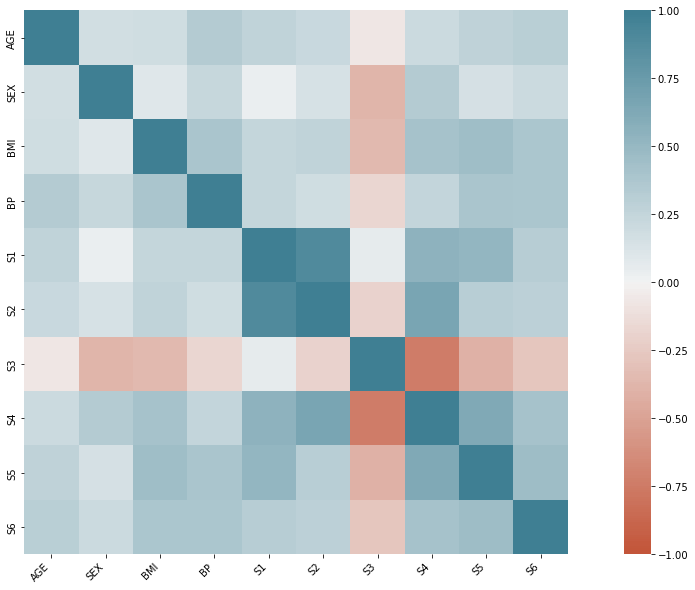

In [13]:
corr = scaled2.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

print(corr.mean(axis =0))

## Robust Scaler


In [14]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

scaled_rob = pd.DataFrame(scaler.fit_transform(X_ori), columns = X_ori.columns)
scaled_rob.head()

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6
0,0.433735,1.0,1.053498,0.380952,-0.637363,-0.514954,-0.571429,0.0,0.332755,-0.271186
1,-0.096386,0.0,-0.674897,-0.285714,-0.065934,-0.254876,1.257143,-0.5,-1.010756,-1.491525
2,1.060241,1.0,0.790123,0.000000,-0.659341,-0.504551,-0.400000,0.0,0.073213,-0.406780
3,-1.253012,0.0,-0.065844,-0.428571,0.263736,0.478544,-0.457143,0.5,0.375087,-0.135593
4,0.000000,0.0,-0.444444,0.380952,0.131868,0.322497,0.228571,0.0,-0.457391,-0.745763


In [15]:
scaled_rob.describe()

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6
count,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000
mean,-0.071417,0.468326,0.111241,0.078429,0.069017,0.063437,0.102198,0.035124,0.029647,0.017639
std,0.631760,0.499561,0.727263,0.658633,0.760617,0.790977,0.739097,0.645225,0.725039,0.779413
min,-1.493976,0.000000,-1.267490,-1.476190,-1.956044,-1.856957,-1.485714,-1.000000,-1.890285,-2.237288
25%,-0.566265,0.000000,-0.411523,-0.428571,-0.478022,-0.440832,-0.442857,-0.500000,-0.476544,-0.525424
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.433735,1.000000,0.588477,0.571429,0.521978,0.559168,0.557143,0.500000,0.523456,0.474576
max,1.397590,1.000000,2.716049,1.904762,2.527473,3.365410,2.914286,2.545000,2.063775,2.237288


AGE    0.287472
SEX    0.199190
BMI    0.306144
BP     0.326266
S1     0.411919
S2     0.377758
S3    -0.155555
S4     0.370602
S5     0.377814
S6     0.351348
dtype: float64


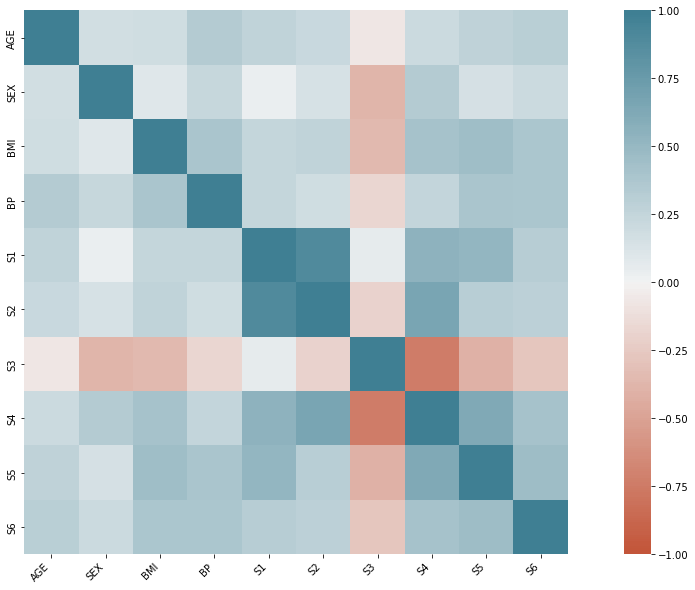

In [16]:
corr = scaled_rob.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

print(corr.mean(axis =0))

           WEIGHT  PRICE
Orange         15      1
Apple          18      3
Banana         12      2
Grape          10      5
Jackfruit      50     20


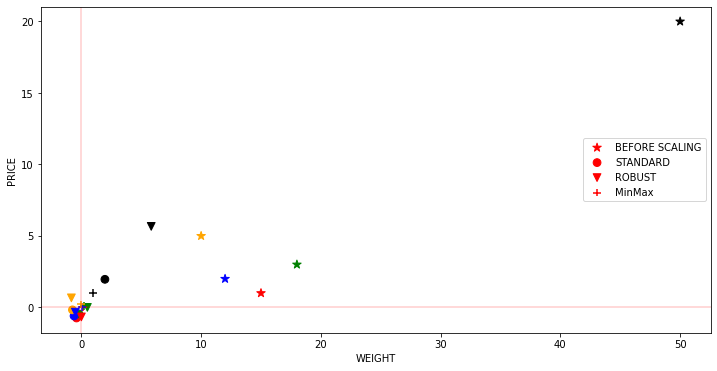

In [238]:
#Exemplo da refrência [5]

dfr = pd.DataFrame({'WEIGHT': [15, 18, 12,10,50],
                   'PRICE': [1,3,2,5,20]},
                   index = ['Orange','Apple','Banana','Grape','Jackfruit'])
print(dfr)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df21 = pd.DataFrame(scaler.fit_transform(dfr),
                   columns=['WEIGHT','PRICE'],
                   index = ['Orange','Apple','Banana','Grape','Jackfruit'])
ax = dfr.plot.scatter(x='WEIGHT', y='PRICE',color=['red','green','blue','orange','black'], 
                     marker = '*',s=80, label='BEFORE SCALING');
df21.plot.scatter(x='WEIGHT', y='PRICE', color=['red','green','blue','orange','black'],
                 marker = 'o',s=60,label='STANDARD', ax = ax,figsize=(12,6))

from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
df31 = pd.DataFrame(scaler.fit_transform(dfr),
                   columns=['WEIGHT','PRICE'],
                   index = ['Orange','Apple','Banana','Grape','Jackfruit'])
df31.plot.scatter(x='WEIGHT', y='PRICE', color=['red','green','blue','orange','black'],
                 marker = 'v',s=60,label='ROBUST', ax = ax,figsize=(12,6))

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df31 = pd.DataFrame(scaler.fit_transform(dfr),
                   columns=['WEIGHT','PRICE'],
                   index = ['Orange','Apple','Banana','Grape','Jackfruit'])
df31.plot.scatter(x='WEIGHT', y='PRICE', color=['red','green','blue','orange','black'],
                 marker = '+',s=60,label='MinMax', ax = ax,figsize=(12,6))
plt.axhline(0, color='red',alpha=0.2)
plt.axvline(0, color='red',alpha=0.2);

In [239]:
# Load the Diabetes dataset
diabetes = datasets.load_diabetes() # Call the diabetes dataset from sklearn

columns = "age sex bmi bp tc ldl hdl tch ltg glu".split() # Declare the columns names

df = pd.DataFrame(diabetes.data, columns=columns) # load the dataset as a pandas data frame

y = diabetes.target # define the target variable (dependent variable) as y

print(y)

[151.  75. 141. 206. 135.  97. 138.  63. 110. 310. 101.  69. 179. 185.
 118. 171. 166. 144.  97. 168.  68.  49.  68. 245. 184. 202. 137.  85.
 131. 283. 129.  59. 341.  87.  65. 102. 265. 276. 252.  90. 100.  55.
  61.  92. 259.  53. 190. 142.  75. 142. 155. 225.  59. 104. 182. 128.
  52.  37. 170. 170.  61. 144.  52. 128.  71. 163. 150.  97. 160. 178.
  48. 270. 202. 111.  85.  42. 170. 200. 252. 113. 143.  51.  52. 210.
  65. 141.  55. 134.  42. 111.  98. 164.  48.  96.  90. 162. 150. 279.
  92.  83. 128. 102. 302. 198.  95.  53. 134. 144. 232.  81. 104.  59.
 246. 297. 258. 229. 275. 281. 179. 200. 200. 173. 180.  84. 121. 161.
  99. 109. 115. 268. 274. 158. 107.  83. 103. 272.  85. 280. 336. 281.
 118. 317. 235.  60. 174. 259. 178. 128.  96. 126. 288.  88. 292.  71.
 197. 186.  25.  84.  96. 195.  53. 217. 172. 131. 214.  59.  70. 220.
 268. 152.  47.  74. 295. 101. 151. 127. 237. 225.  81. 151. 107.  64.
 138. 185. 265. 101. 137. 143. 141.  79. 292. 178.  91. 116.  86. 122.
  72. 

In [240]:
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [241]:
df.head()

,age,sex,bmi,bp,tc,ldl,hdl,tch,ltg,glu
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


# Cross Validation

## Random Split

In [242]:
# create training and testing vars
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.20, random_state = 10)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(353, 10) (353,)
(89, 10) (89,)


In [243]:
# fit a model
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)

Text(0, 0.5, 'Predictions')

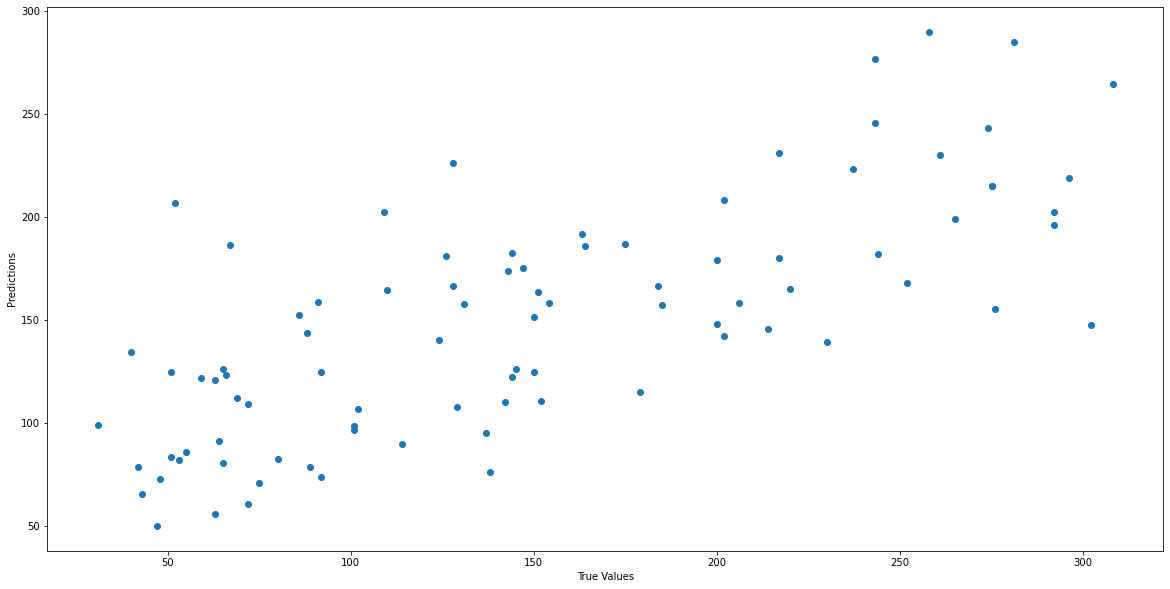

In [244]:
## The line / model
plt.scatter(y_test, predictions)
plt.xlabel("True Values")
plt.ylabel("Predictions")

In [245]:
print("Score:", model.score(X_test, y_test))

Score: 0.5341962544929233


## K-Folds Cross Validation

In [246]:
#from sklearn.model_selection import KFold # import KFold
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics

splits = 16
scores = cross_val_score(model, df, y, cv=splits)
print("Cross-validated scores:", scores)


Cross-validated scores: [0.37966069 0.56185926 0.18618032 0.20049243 0.54116076 0.51287577
 0.45934889 0.2688694  0.63870612 0.57797065 0.40679287 0.19850536
 0.5354363  0.17377977 0.7690023  0.61634861]


Text(0, 0.5, 'Predictions')

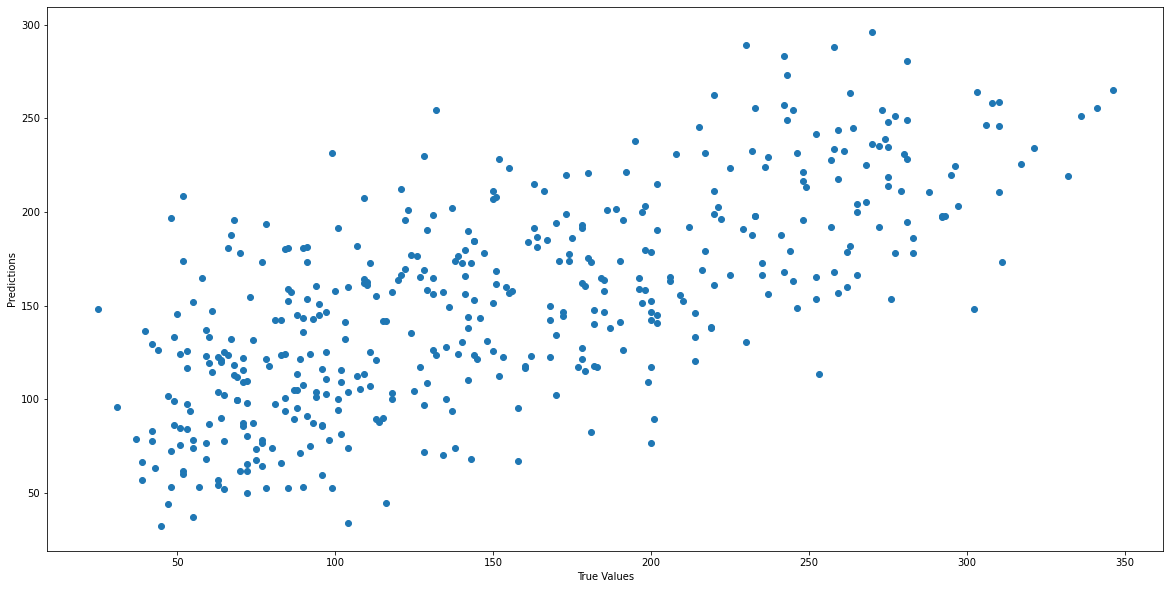

In [247]:
# Make cross validated predictions
predictions = cross_val_predict(model, df, y, cv=splits)
plt.scatter(y, predictions)
plt.xlabel("True Values")
plt.ylabel("Predictions")

In [248]:
accuracy = metrics.r2_score(y, predictions)
print("Cross-Predicted Accuracy:", accuracy)

Cross-Predicted Accuracy: 0.49360634594761155


Splits: 2  Accuracy: 0.4953824380289852
Splits: 3  Accuracy: 0.48950770404311716
Splits: 4  Accuracy: 0.5004949801267402
Splits: 5  Accuracy: 0.49532382463572844
Splits: 6  Accuracy: 0.4908065838640775
Splits: 7  Accuracy: 0.49269769754902226
Splits: 8  Accuracy: 0.4921056046382969
Splits: 9  Accuracy: 0.4944502699427642
Splits: 10  Accuracy: 0.494251180618835
Splits: 11  Accuracy: 0.49631561636805677
Splits: 12  Accuracy: 0.49341948787135526
Splits: 13  Accuracy: 0.4896532118607002
Splits: 14  Accuracy: 0.49640279369664697
Splits: 15  Accuracy: 0.4927933975019788


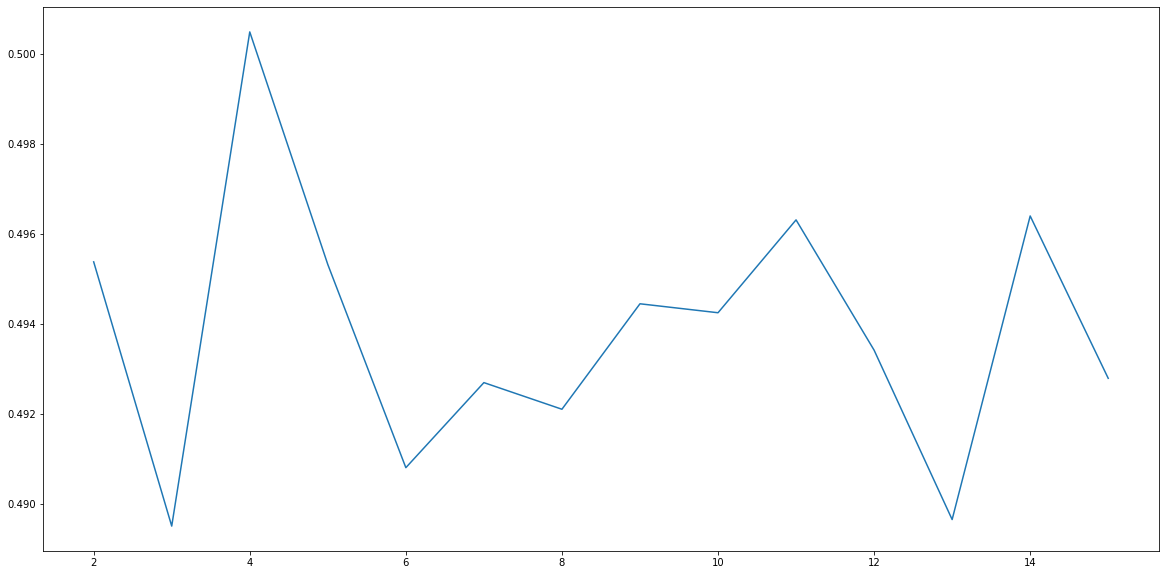

In [249]:
models_best = pd.DataFrame(columns=["Splits", "Accuracy"])

for s in range(2,splits):
    predictions = cross_val_predict(model, df, y, cv=s)
    accuracy = metrics.r2_score(y, predictions)
    print("Splits:", s, " Accuracy:", accuracy)
    models_best.loc[s-2] = [s, accuracy]

models_best.head()
plt.plot(models_best["Splits"] ,models_best["Accuracy"])


## Leave ONE out

 Accuracy: 0.4937935079824348


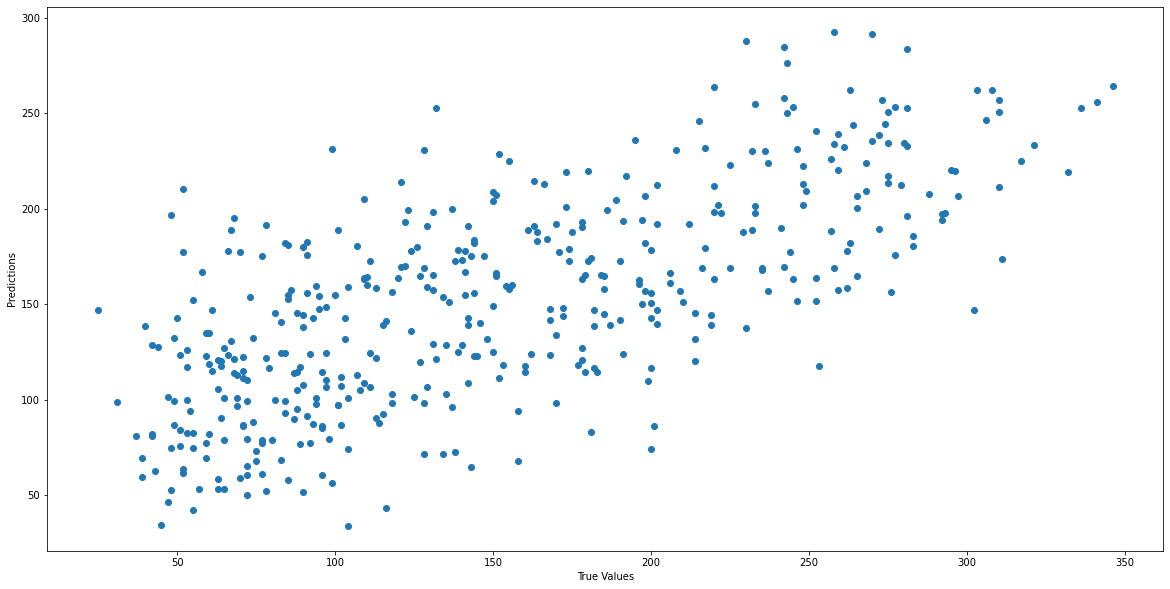

In [250]:
from sklearn.model_selection import LeaveOneOut 

loo = LeaveOneOut()

predictions = cross_val_predict(model, df, y, cv=loo)
plt.scatter(y, predictions)
plt.xlabel("True Values")
plt.ylabel("Predictions")

accuracy = metrics.r2_score(y, predictions)
print(" Accuracy:", accuracy)


## References

[1] https://towardsdatascience.com/train-test-split-and-cross-validation-in-python-80b61beca4b6

[2] https://www4.stat.ncsu.edu/~boos/var.select/diabetes.tab.txt

[3] https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html

[4] https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_predict.html?highlight=cross_val_predict

[5] https://towardsdatascience.com/all-about-feature-scaling-bcc0ad75cb35

[6] https://jakevdp.github.io/PythonDataScienceHandbook/index.html


## Change Log

|  Date (YYYY-MM-DD) |  Version | Changed By  |  Change Description |
|---|---|---|---|
| 2020-10-27  | 0.9  | <a href="https://www.linkedin.com/in/eduardopecora/" target="_blank">Eduardo Pécora</a> |  Initial development |

<hr>